# Multiple Correspondence Analysis with Central Asian Countries and Organizations

by Kyle Jones, D.ENG.

December 20, 2018

Uses the MCA technique to identify similarities in multilateral diplomacy of Central Asian countries based on their participation in political economic organizations.

In [46]:
import numpy as np
import pandas as pd
import mca

In [62]:
df = pd.read_excel('correspond.xlsx', skiprows=0, index_col=0, header=0)

In [48]:
df.head()

,OSCE,Eurasian Economic Union,Eurasian customs union,Commonwealth of Independent States Free Trade Area,Shainghai Cooperation Organizatin,Collective Security Treaty Organization,parternship for peace,Asia-Pacific Economic Cooperation,Eurasian Economic Union.1,Individual action plan (NATO),commonwealth of indipendent states,Economic Cooperation Organization
Country,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,1
Armenia,1,1,1,1,0,1,1,0,1,1,1,0
Australia,0,0,0,0,0,0,0,1,0,0,0,0
Azerbaijan,1,0,0,1,0,0,1,0,0,1,1,1
Belarus,1,1,1,1,0,1,1,0,1,0,1,0


In [53]:
x_dummy = mca.dummy(df)
mca_ben = mca.MCA(x_dummy) 

In [65]:
src_index = (['OSCE']*2 +
['Eurasian Economic Union']*2 +
['Eurasian customs union']*2 +
['Commonwealth of Independent States Free Trade Area']*2+ 
['Shainghai Cooperation Organizatin']*2+
['Collective Security Treaty Organization']*2+
['parternship for peace']*2+
['Asia-Pacific Economic Cooperation']*2+
['Eurasian Economic Union.1']*2+
['Individual action plan (NATO)']*2+
['commonwealth of indipendent states']*2+
['Economic Cooperation Organization']*2
            )

In [66]:
yn = ['y','n']; val_index = yn*len(df.columns)
col_index = pd.MultiIndex.from_arrays([src_index, val_index], 
                                      names=['source', 'value'])

In [67]:
table1 = pd.DataFrame(data=x_dummy.values, index=x_dummy.index, columns=col_index)

In [68]:
table1

source         OSCE    Eurasian Economic Union    Eurasian customs union     \
value             y  n                       y  n                      y  n   
Country                                                                       
Afghanistan       1  0                       1  0                      1  0   
Armenia           0  1                       0  1                      0  1   
Australia         1  0                       1  0                      1  0   
Azerbaijan        0  1                       1  0                      1  0   
Belarus           0  1                       0  1                      0  1   
Bosnia            0  1                       1  0                      1  0   
China             1  0                       1  0                      1  0   
Georgia           0  1                       1  0                      1  0   
Kazakhstan        0  1                       0  1                      0  1   
Kyrgyzstan        0  1                       0  1                      0  1   
Moldova           0  1                       1  0                      1  0   
Pakistan          1  0                       1  0                      1  0   
Russia            0  1                       0  1                      0  1   
Serbia            0  1                       1  0                      1  0   
Tajikistan        0  1                       1  0                      1  0   
ThePhilippines    1  0                       1  0                      1  0   
UnitedStates      0  1                       1  0                      1  0   
Turkmenistan      0  1                       1  0                      1  0   
Ukraine           0  1                       1  0                      1  0   
Uzbekistan        0  1                       1  0                      1  0   
Vietnam           1  0                       1  0                      1  0   

source         Commonwealth of Independent States Free Trade Area     \
value                                                           y  n   
Country                                                                
Afghanistan                                                     1  0   
Armenia                                                         0  1   
Australia                                                       1  0   
Azerbaijan                                                      0  1   
Belarus                                                         0  1   
Bosnia                                                          1  0   
China                                                           1  0   
Georgia                                                         1  0   
Kazakhstan                                                      0  1   
Kyrgyzstan                                                      0  1   
Moldova                                                         0  1   
Pakistan                                                        1  0   
Russia                                                          0  1   
Serbia                                                          1  0   
Tajikistan                                                      0  1   
ThePhilippines                                                  1  0   
UnitedStates                                                    1  0   
Turkmenistan                                                    1  0   
Ukraine                                                         0  1   
Uzbekistan                                                      0  1   
Vietnam                                                         1  0   

source         Shainghai Cooperation Organizatin    ...  \
value                                          y  n ...   
Country                                             ...   
Afghanistan                                    1  0 ...   
Armenia                                        1  0 ...   
Australia                                      1  0 ...   
Azerbaijan          

In [54]:
mca_ben

In [69]:
ncols = 24
mca_ben = mca.MCA(x_dummy, ncols=ncols)
mca_ind = mca.MCA(x_dummy, ncols=ncols, benzecri=False)

print(mca.MCA.__doc__)

Run MCA on selected columns of a pd DataFrame.
	
	If the column are specified, assume that they hold
	categorical variables that need to be replaced with
	dummy indicators, otherwise process the DataFrame as is.

	'cols': The columns of the DataFrame to process.
	'ncols': The number of columns before dummy coding. To be passed if cols isn't.
	'benzecri': Perform Benzécri correction (default: True)
	'TOL': value below which to round eigenvalues to zero (default: 1e-4)
	


In [71]:
data = {'Zλ': pd.Series(mca_ben.L),
        'τZ': mca_ben.expl_var(greenacre=False, N=4)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ', 'τI', 'Zλ', 'τZ', 'cλ', 'τc']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2

,Iλ,τI,Zλ,τZ,cλ,τc
Factor,,,,,,
1,0.0,0.0,0.189404,0.848371,0.0,0.0
2,0.0,0.0,0.021760,0.097465,0.0,0.0
3,0.0,0.0,0.010035,0.044949,0.0,0.0
4,0.0,0.0,0.002052,0.009190,0.0,0.0
Σ,0.0,0.0,0.223250,0.999976,0.0,0.0


In [57]:
data = np.array([mca_ben.L[:2], 
                 mca_ben.expl_var(greenacre=True, N=2) * 100]).T
df = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,3))
df

,cλ,%c
1,0.189404,66.192765
2,0.021760,7.604566


In [63]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=x_dummy.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000

np.round(table3.astype(float), 2)

Country                 Afghanistan  Armenia  Australia  Azerbaijan  Belarus  \
Factor score         1         0.39    -0.69       0.50       -0.10    -0.66   
                     2        -0.03     0.02      -0.15        0.26    -0.06   
Squared cosines      1         0.93     0.95       0.90        0.13     0.97   
                     2         0.01     0.00       0.09        0.84     0.01   
Contributions x 1000 1        38.67   120.62      62.64        2.68   107.96   
                     2         2.06     0.77      52.14      148.63     7.59   

Country                 Bosnia  China  Georgia  Kazakhstan  Kyrgyzstan  \
Factor score         1    0.28   0.43     0.21       -0.72       -0.69   
                     2    0.11  -0.21     0.19       -0.09       -0.17   
Squared cosines      1    0.75   0.81     0.48        0.97        0.92   
                     2    0.11   0.19     0.40        0.02        0.06   
Contributions x 1000 1   19.56  47.07    10.89      131.99      118.73   
                     2   25.57  94.03    78.68       19.09       64.05   

Country                  ...     Pakistan  Russia  Serbia  Tajikistan  \
Factor score         1   ...         0.33   -0.65    0.14       -0.27   
                     2   ...        -0.08   -0.21    0.07        0.10   
Squared cosines      1   ...         0.72    0.89    0.45        0.64   
                     2   ...         0.05    0.10    0.12        0.08   
Contributions x 1000 1   ...        26.68  106.60    5.01       18.35   
                     2   ...        15.30   99.50   12.05       20.20   

Country                 ThePhilippines  UnitedStates  Turkmenistan   Ukraine  \
Factor score         1            0.50          0.39           0.21     0.11   
                     2           -0.15         -0.07           0.13     0.14   
Squared cosines      1            0.90          0.93           0.66     0.33   
                     2            0.09          0.03           0.27     0.55   
Contributions x 1000 1           62.64         37.64          10.99     3.11   
                     2           52.14         11.03          39.40    44.32   

Country                 Uzbekistan  Vietnam  
Factor score         1       -0.13     0.50  
                     2        0.13    -0.15  
Squared cosines      1        0.24     0.90  
                     2        0.23     0.09  
Contributions x 1000 1        4.40    62.64  
                     2       36.98    52.14  

[6 rows x 21 columns]

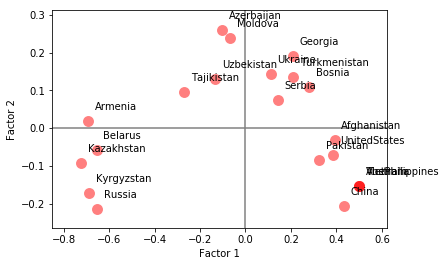

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

points = table3.loc[fs].values
labels = table3.columns.values

plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=120, marker='o', c='r', alpha=.5, linewidths=0)
for label, x, y in zip(labels, *points):
    plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
plt.show()